In [68]:
# https://towardsdatascience.com/autoencoder-neural-networks-what-and-how-354cba12bf86



In [38]:
#!pip install --upgrade tensorflow

In [39]:
#!pip install --upgrade keras

In [40]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

In [53]:
# Importing modules to create our layers and model.

from tensorflow import keras

from tensorflow.keras import layers #import Input, Dense
from tensorflow.keras import models #import Model

# Importing standard utils
import numpy as np
import matplotlib.pyplot as plt


In [42]:
(train_xs, _), (test_xs, _) = keras.datasets.mnist.load_data()


In [43]:
# Note the '.' after the 255, this is correct for the type we're dealing with. It means do not interpret 255 as an integer. 
train_xs = train_xs.astype('float32') / 255.
test_xs = test_xs.astype('float32') / 255.

In [44]:
train_xs = train_xs.reshape((len(train_xs), np.prod(train_xs.shape[1:])))
test_xs = test_xs.reshape((len(test_xs), np.prod(test_xs.shape[1:])))

In [60]:
# Defining the level of compression of the hidden layer. Basically, as the input is passed through the encoding layer, it will come out smaller if you want it to find salient features. If I choose 784 for my encoding dimension, there would be a compression factor of 1, or nothing.
encoding_dim = 64
input_img = keras.Input(shape=(784, ))
# This is the size of the output. We want to generate 28 x 28 pictures in the end, so this is the size we're looking for. 
output_dim = 784
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
decoded = layers.Dense(output_dim, activation='sigmoid')(encoded)

In [61]:
autoencoder = models.Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [62]:
autoencoder.fit(train_xs, train_xs, epochs=15, batch_size=256, shuffle=True, validation_data=(test_xs, test_xs))

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 4s 73us/sample - loss: 0.6935 - val_loss: 0.6934
Epoch 2/15
60000/60000 [==============================] - 3s 47us/sample - loss: 0.6933 - val_loss: 0.6932
Epoch 3/15
60000/60000 [==============================] - 3s 48us/sample - loss: 0.6930 - val_loss: 0.6929
Epoch 4/15
60000/60000 [==============================] - 3s 47us/sample - loss: 0.6928 - val_loss: 0.6927
Epoch 5/15
60000/60000 [==============================] - 3s 47us/sample - loss: 0.6926 - val_loss: 0.6925
Epoch 6/15
60000/60000 [==============================] - 3s 46us/sample - loss: 0.6923 - val_loss: 0.6922
Epoch 7/15
60000/60000 [==============================] - 3s 48us/sample - loss: 0.6921 - val_loss: 0.6920
Epoch 8/15
60000/60000 [==============================] - 3s 48us/sample - loss: 0.6919 - val_loss: 0.6918
Epoch 9/15
60000/60000 [==============================] - 3s 48us/sample - loss: 0.6917 - val_

In [63]:
# Run your predictions and store them in a decoded_images list. 
decoded_images = autoencoder.predict(test_xs)

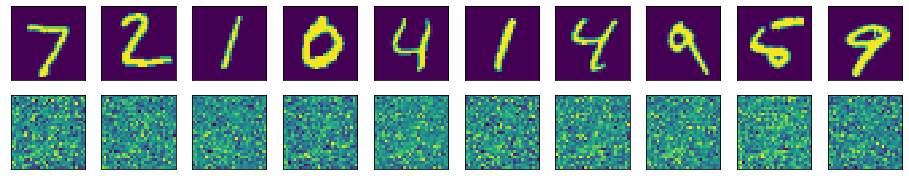

In [64]:
# We'll plot 10 images. 
n = 10
plt.figure(figsize=(16, 3))
for i in range(n):
    # Show the originals
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test_xs[i].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
# Show the reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_images[i].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [65]:
# Create a Model from the layer. 
encoder = keras.Model(input_img, encoded)
# Save the results to encoded_imgs. This must be done after the autoencoder model has been trained in order to use the trained weights.
encoded_imgs = encoder.predict(test_xs)

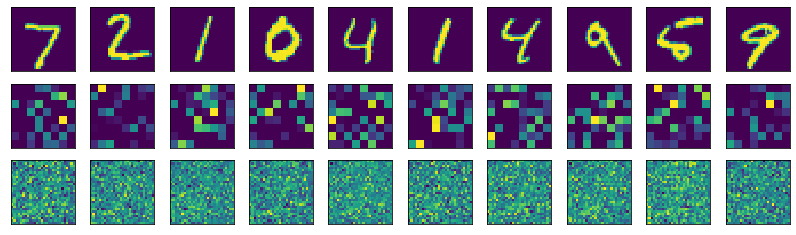

In [67]:
# We'll plot 10 images. 
n = 10
plt.figure(figsize=(14, 4))
for i in range(n):
    # Show the originals
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(test_xs[i].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # Show the middle layer
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(8, 8))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # Show the reconstruction
    ax = plt.subplot(3, n, i + 1 + n * 2)
    plt.imshow(decoded_images[i].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()